<a href="https://colab.research.google.com/github/srinivas019/edunet/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


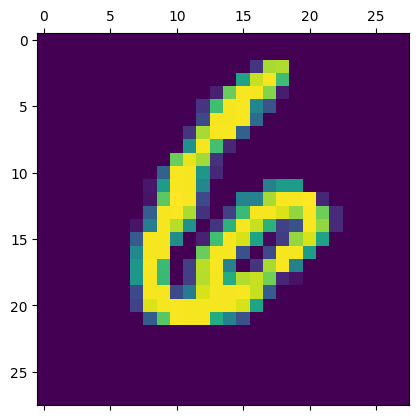

In [ ]:
len(x_train)
len(x_test)
x_train[13].shape
plt.matshow(x_train[13])

In [ ]:
x_train = x_train/255
x_test = x_test/255

# Flatting the dataset in order
# to compute for model building
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [ ]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
import matplotlib.pyplot as plt

def show_images(train_images,class_names,train_labels,nb_samples = 12, nb_row = 4):
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
    	plt.subplot(nb_row, nb_row, i + 1)
    	plt.xticks([])
    	plt.yticks([])
    	plt.grid(False)
    	plt.imshow(train_images[i], cmap=plt.cm.binary)
    	plt.xlabel(class_names[train_labels[i][0]])
plt.show()

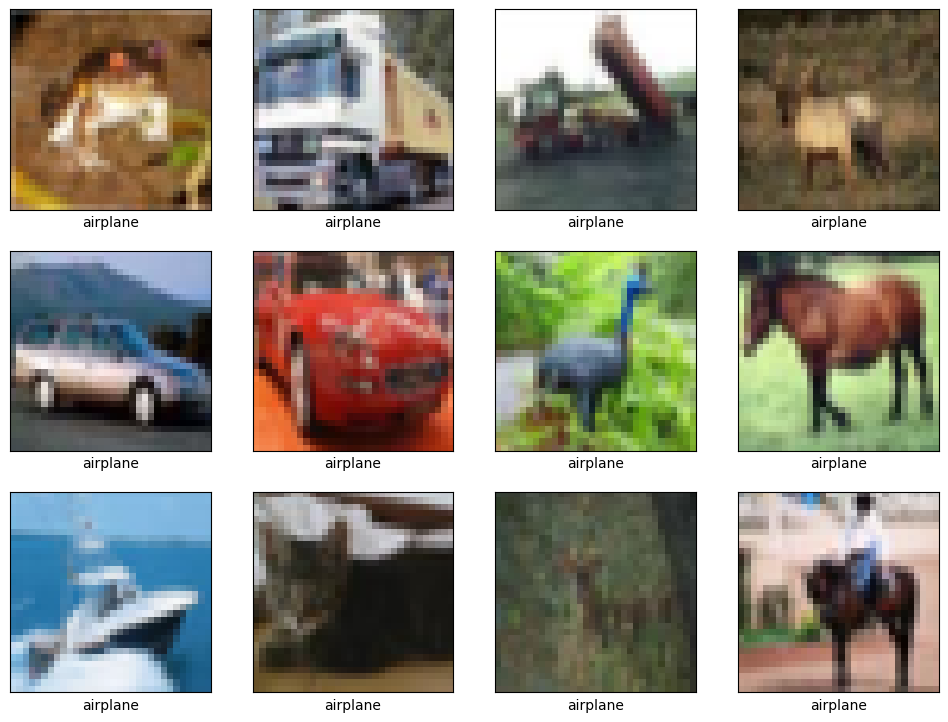

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names,train_labels)

In [26]:
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images /max_pixel_value

In [27]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.3937 - loss: 1.6563 - precision: 0.6469 - recall: 0.1574 - val_accuracy: 0.5881 - val_loss: 1.1779 - val_precision: 0.7728 - val_recall: 0.3826
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.6143 - loss: 1.0984 - precision: 0.7639 - recall: 0.4557 - val_accuracy: 0.6619 - val_loss: 0.9768 - val_precision: 0.7948 - val_recall: 0.5218
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.6734 - loss: 0.9346 - precision: 0.7902 - recall: 0.5552 - val_accuracy: 0.6600 - val_loss: 0.9679 - val_precision: 0.7790 - val_recall: 0.5387
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.7146 - loss: 0.8215 - precision: 0.8117 - recall: 0.6171 - val_accuracy: 0.6905 - val_loss: 0.9082 - val_precision: 0.7773 - val_recall: 0.6088
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 26ms/step - accuracy: 0.7403 - loss: 0.7419 - precision: 0.8260 - recall: 0.6563 - val_accuracy: 0.6865

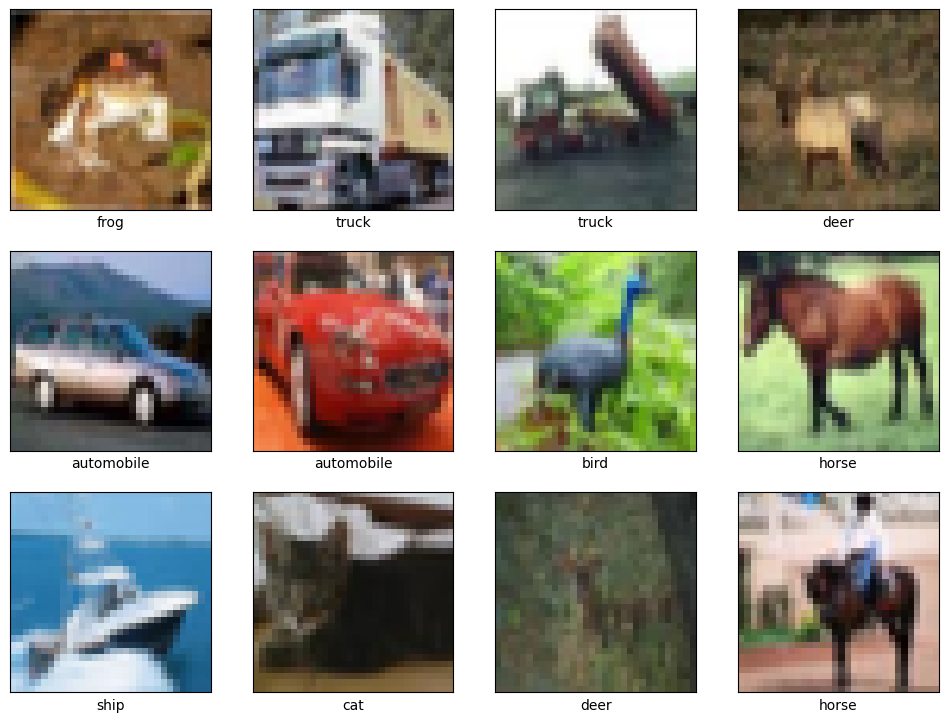

In [51]:
from IPython import get_ipython
from IPython.display import display
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Load CIFAR-10 dataset
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

# Display sample images
def show_images(train_images,class_names,train_labels,nb_samples = 12, nb_row = 4):
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
    	plt.subplot(nb_row, nb_row, i + 1)
    	plt.xticks([])
    	plt.yticks([])
    	plt.grid(False)
    	plt.imshow(train_images[i], cmap=plt.cm.binary)
    	plt.xlabel(class_names[train_labels[i][0]])
plt.show()
show_images(train_images, class_names,train_labels)

# Normalize pixel values
max_pixel_value = 255
train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
NUM_CLASSES = len(class_names) # Define NUM_CLASSES here
train_labels = to_categorical(train_labels, num_classes=NUM_CLASSES)
test_labels = to_categorical(test_labels, num_classes=NUM_CLASSES)

# Build the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128


# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Display model summary
model.summary()

# Compile and train the model
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 5

METRICS = ['accuracy', Precision(name='precision'), Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics=METRICS)

training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

In [46]:
def plotLosses(training_history):
    plt.plot(training_history.history['loss'])
    plt.plot(training_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

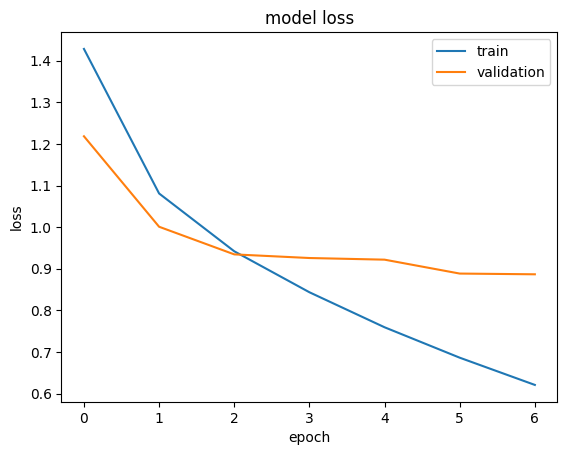

In [47]:
plotLosses(training_history)

In [48]:
def plotAccuracy(training_history):
    plt.plot(training_history.history['accuracy'])
    plt.plot(training_history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

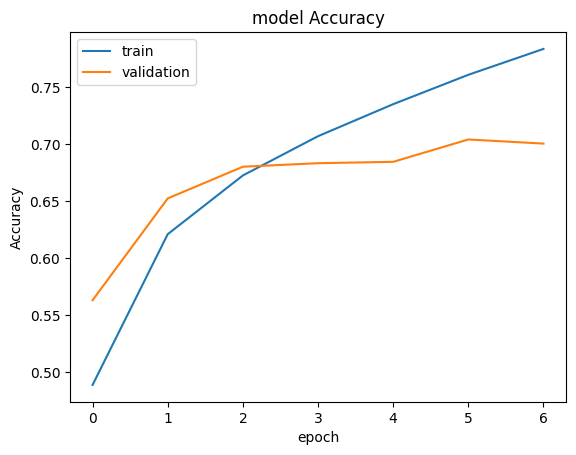

In [49]:
plotAccuracy(training_history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


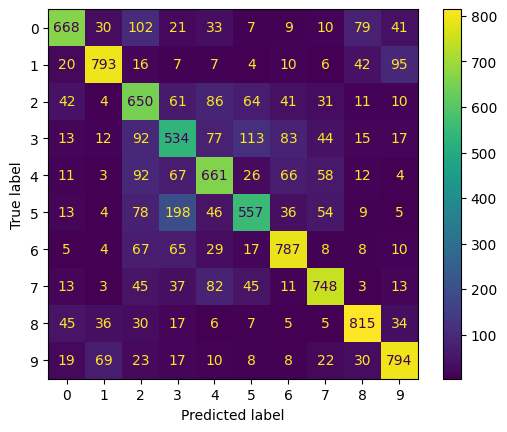

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [52]:
# Instead of model.accuracy(), use the following:
accuracy = model.evaluate(test_images, test_labels, verbose=0)
print('Accuracy: %.2f' % (accuracy[0]*100)) # Access the first element of the accuracy list

Accuracy: 92.50
